# CCA vs PLS errors

In [12]:
import numpy as np
import xarray as xr

from gemmr.data import load_outcomes, print_ds_stats
from gemmr.metrics import *
from gemmr.sample_size.interpolation import calc_n_required_all_metrics
from gemmr.util import subset_ds

import colorcet
import holoviews as hv
hv.extension('matplotlib')
hv.renderer('matplotlib').param.set_param(dpi=120)
from holoviews import opts

from my_config import *

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Setup

In [3]:
data_home = None
ds_cca = load_outcomes('sweep_cca_cca_random_sum+-3+0_wOtherModel', model='cca', add_prefix='cca_', data_home=data_home).sel(mode=0)
ds_pls = load_outcomes('sweep_pls_pls_random_sum+-3+0_wOtherModel', model='pls', add_prefix='pls_', data_home=data_home).sel(mode=0)
ds = xr.concat([ds_cca, ds_pls], 'Sigma_id')

Loading data from subfolder 'gemmr_latest'
Loading data from subfolder 'gemmr_latest'


In [4]:
ds_cca = ds_cca.sel(px=ds_cca.px < 128)
ds_pls = ds_pls.sel(px=ds_pls.px < 128)

In [5]:
ds_cca = subset_ds(ds_cca, n_keep=25, keyvar='cca_between_assocs')
ds_pls = subset_ds(ds_pls, n_keep=25, keyvar='pls_between_assocs')

In [6]:
print_ds_stats(ds_cca, prefix='cca_')

n_rep		 100
n_per_ftr	 [   3    4    8   16   32   64  128  256  512 1024 2048 4096 8192]
r		 [0.1 0.3 0.5 0.7]
px		 [ 2  4  8 16 32 64]
ax+ay range	(-2.97, -0.10)
py		== px

<xarray.DataArray 'n_Sigmas' (px: 6, r: 4)>
array([[25, 25, 25, 25],
       [25, 25, 25, 25],
       [25, 25, 25, 25],
       [25, 25, 25, 25],
       [25, 25, 25, 25],
       [ 0, 25, 25, 25]])
Coordinates:
  * r        (r) float64 0.1 0.3 0.5 0.7
  * px       (px) int64 2 4 8 16 32 64

power		calculated


In [7]:
print_ds_stats(ds_pls, prefix='pls_')

n_rep		 100
n_per_ftr	 [   3    4    8   16   32   64  128  256  512 1024 2048 4096 8192]
r		 [0.1 0.3 0.5 0.7]
px		 [ 2  4  8 16 32 64]
ax+ay range	(-2.97, -0.10)
py		== px

<xarray.DataArray 'n_Sigmas' (px: 6, r: 4)>
array([[25, 25, 25, 25],
       [25, 25, 25, 25],
       [25, 25, 25, 25],
       [ 0, 25, 25, 25],
       [ 0, 25, 25, 25],
       [ 0,  0,  0, 21]])
Coordinates:
  * r        (r) float64 0.1 0.3 0.5 0.7
  * px       (px) int64 2 4 8 16 32 64

power		calculated


## Analysis

:Layout
   .Overlay.Combined              :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Power                 :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Assocciation_strength :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Correlation           :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Weight                :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Score                 :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Loading               :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
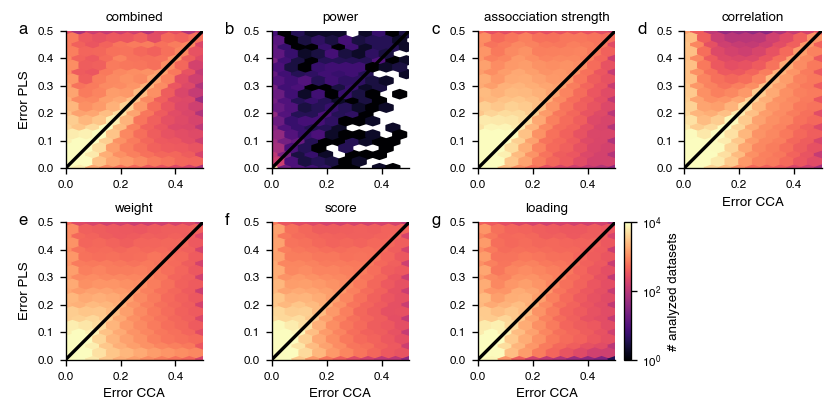

In [8]:
r = slice(None)
px = slice(None)
n_per_ftr = slice(None)#ds.n_per_ftr > 4

fig_ccaVsPls = hv.Layout()

for metric_lbl, metric in [
        ('combined', lambda *args, **kwargs: mk_combinedError(*args, assoc_metric='corr', abs_assoc_error=True, **kwargs)), 
        ('power', mk_fnr), 
        ('assocciation strength', mk_absBetweenAssocRelError), 
        ('correlation', mk_absBetweenCorrRelError), 
        ('weight', mk_weightError), 
        ('score', mk_scoreError), 
        ('loading', mk_loadingError)
    ]:

    if metric_lbl == 'loading':
        colorbar = True
    else:
        colorbar = False

    if metric_lbl in ['weight', 'score', 'loading', 'correlation']:
        xlabel = None
    else:
        xlabel = ''

    if metric_lbl in ['combined', 'weight']:
        ylabel = None
    else:
        ylabel = ''

    e_cca = metric(ds, prefix='cca_').dropna('n_per_ftr', how='all')
    e_pls = metric(ds, prefix='pls_').dropna('n_per_ftr', how='all')
    fig_ccaVsPls += (
        hv.HexTiles(
            (e_cca.where(e_cca < 0.5).sel(r=r, px=px, n_per_ftr=n_per_ftr).values.ravel(), 
             e_pls.where(e_pls < 0.5).sel(r=r, px=px, n_per_ftr=n_per_ftr).values.ravel())
        )
        * hv.Curve(([0, 1], [0, 1])).opts(color='black')

    ).redim(
        x='Error CCA',
        y='Error PLS'
    ).opts(
        opts.HexTiles(
            cmap='magma', colorbar=colorbar, logz=True, clim=(1, 10000), gridsize=(10, 10), xlim=(0, 0.5), ylim=(0, 0.5), 
            clabel='# analyzed datasets', xlabel=xlabel, ylabel=ylabel
        )
    ).relabel(
        metric_lbl
    )

fig_ccaVsPls = fig_ccaVsPls.cols(
    4
).opts(*fig_opts).opts(
    fig_inches=(7, None), sublabel_position=(-.45, .85)
)

fig_ccaVsPls

In [9]:
pc1_proj = np.maximum(
    np.abs(ds.pls_x_weights_true.sel(x_feature=0)),
    np.abs(ds.pls_y_weights_true.sel(y_feature=0)),
)
pc1_proj.dims

('px', 'r', 'Sigma_id')

:Layout
   .HexTiles.Combined              :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Power                 :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Assocciation_strength :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Correlation           :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Weight                :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Score                 :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Loading               :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
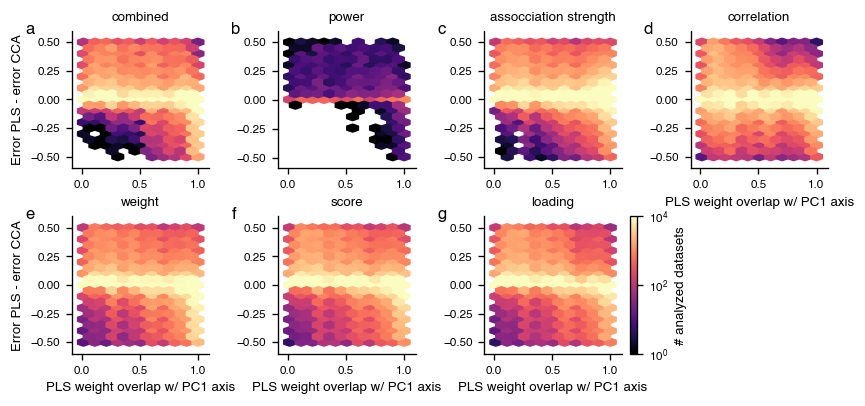

In [10]:
px = slice(None)
r = slice(None)
n_per_ftr = slice(None)

fig_deltaE = hv.Layout()
for metric_lbl, metric in [
        ('combined', lambda *args, **kwargs: mk_combinedError(*args, assoc_metric='corr', abs_assoc_error=True, **kwargs)), 
        ('power', mk_fnr), 
        ('assocciation strength', mk_absBetweenAssocRelError), 
        ('correlation', mk_absBetweenCorrRelError), 
        ('weight', mk_weightError), 
        ('score', mk_scoreError), 
        ('loading', mk_loadingError)
    ]:

    if metric_lbl == 'loading':
        colorbar = True
    else:
        colorbar = False

    if metric_lbl in ['weight', 'score', 'loading', 'correlation']:
        xlabel = None
    else:
        xlabel = ''

    if metric_lbl in ['combined', 'weight']:
        ylabel = None
    else:
        ylabel = ''

    e_cca = metric(ds, prefix='cca_')
    e_pls = metric(ds, prefix='pls_')
    de = e_pls - e_cca

    if 'rep' in de.dims:
        pc1_proj_ = pc1_proj.expand_dims(rep=de.rep, n_per_ftr=de.n_per_ftr)
    else:
        pc1_proj_ = pc1_proj.expand_dims(n_per_ftr=de.n_per_ftr)

    fig_deltaE += hv.HexTiles(
        (pc1_proj_.transpose(*de.dims).sel(r=r, px=px, n_per_ftr=n_per_ftr).values.ravel(), 
        de.where((np.abs(de) >= 0.0) & (np.abs(de) < .5) & ((e_cca < 0.5) | (e_pls < 0.5))).sel(r=r, px=px, n_per_ftr=n_per_ftr).values.ravel()),
    ).redim(
        x='PLS weight overlap w/ PC1 axis',
        y='Error PLS - error CCA',
    ).opts(
        opts.HexTiles(gridsize=(10, 10), colorbar=colorbar, logz=True, clim=(1, 10000), cmap='magma', clabel='# analyzed datasets', xlabel=xlabel, ylabel=ylabel)
    ).relabel(
        metric_lbl
    )

fig_deltaE = fig_deltaE.cols(
    4
).opts(*fig_opts).opts(
    fig_inches=(7, None), sublabel_position=(-.45, .85)
)

fig_deltaE

## Assemble figure

:Layout
   .Overlay.Combined               :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Power                  :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Assocciation_strength  :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Correlation            :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Weight                 :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Score                  :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.Loading                :Overlay
      .HexTiles.I :HexTiles   [Error CCA,Error PLS]
      .Curve.I    :Curve   [Error CCA]   (Error PLS)
   .Overlay.I                      :Overlay
   .HexTiles.Combined              :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Power                 :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Assocciation_strength :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Correlation           :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Weight                :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Score                 :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
   .HexTiles.Loading               :HexTiles   [PLS weight overlap w/ PC1 axis,Error PLS - error CCA]
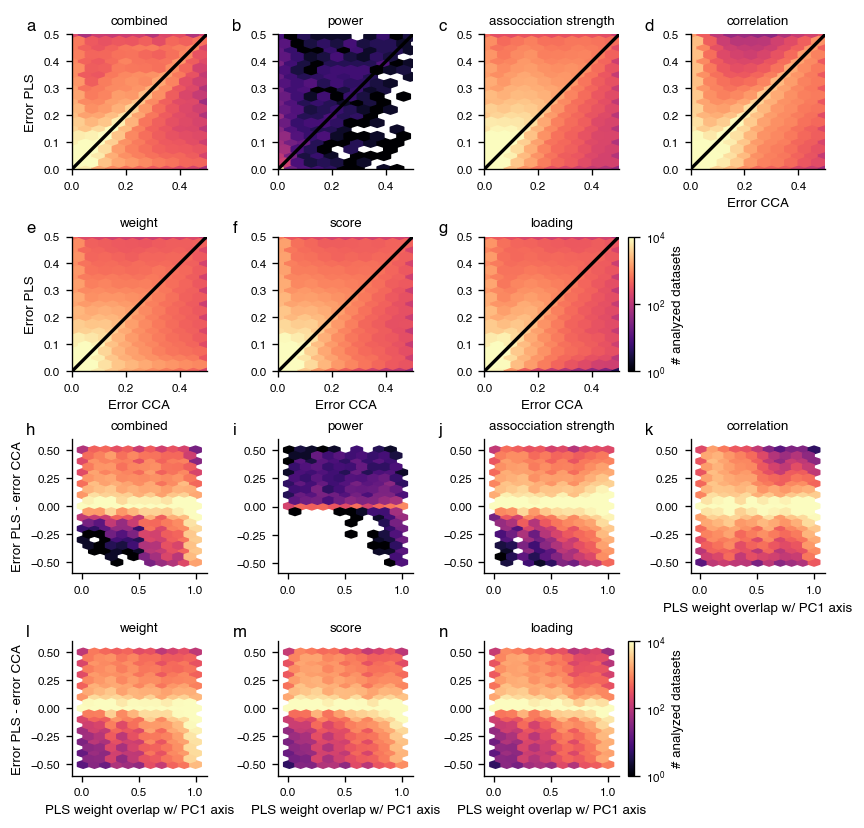

In [11]:
fig = (
    fig_ccaVsPls
    + hv.Overlay()  # empty plot to fill space
    + fig_deltaE
)

fig = fig.cols(
    4
).opts(*fig_opts).opts(
    fig_inches=(7, None), vspace=.5, sublabel_position=(-.45, .9)
)

hv.save(fig, 'fig/figS_cca_vs_pls.pdf')

fig